In [3]:
# call libraries
# python libraries are a set of useful functions that eliminate the need for writing codes from scratch

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
#https://docs.google.com/spreadsheets/d/10poofg-l8DMdtUgGy8mOpra2IHmA9EQC7drmF9AyYHA/edit#gid=1485085913

# Read Data and Clean

In [4]:
# read data from google sheet
sheet_url = 'https://docs.google.com/spreadsheets/d/10poofg-l8DMdtUgGy8mOpra2IHmA9EQC7drmF9AyYHA/edit#gid=1485085913'
sheet_url_trf = sheet_url.replace('/edit#gid=','/export?format=csv&gid=') 
df = pd.read_csv(sheet_url_trf)
df.head()

,Name,Sales,Series,Release,Genre,Developer,Publisher
0,PlayerUnknown's Battlegrounds,42.0,NaN,12/1/2017,Battle royale,PUBG Studios,Krafton
1,Minecraft,33.0,Minecraft,11/1/2011,"Sandbox, survival",Mojang Studios,Mojang Studios
2,Diablo III,20.0,Diablo,5/1/2012,Action role-playing,Blizzard Entertainment,Blizzard Entertainment
3,Garry's Mod,20.0,NaN,11/1/2006,Sandbox,Facepunch Studios,Valve
4,Terraria,17.2,NaN,5/1/2011,Action-adventure,Re-Logic,Re-Logic


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 177 entries, 0 to 176
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Name       177 non-null    object 
 1   Sales      177 non-null    float64
 2   Series     141 non-null    object 
 3   Release    177 non-null    object 
 4   Genre      177 non-null    object 
 5   Developer  177 non-null    object 
 6   Publisher  177 non-null    object 
dtypes: float64(1), object(6)
memory usage: 9.8+ KB


In [6]:
df.columns

Index(['Name', 'Sales', 'Series', 'Release', 'Genre', 'Developer',
       'Publisher'],
      dtype='object')

In [7]:
df_cleaned = df.copy()
df_cleaned['Release'] = pd.to_datetime(df_cleaned['Release'])

print(df_cleaned.dtypes)
df_cleaned.head()

Name                 object
Sales               float64
Series               object
Release      datetime64[ns]
Genre                object
Developer            object
Publisher            object
dtype: object


,Name,Sales,Series,Release,Genre,Developer,Publisher
0,PlayerUnknown's Battlegrounds,42.0,NaN,2017-12-01,Battle royale,PUBG Studios,Krafton
1,Minecraft,33.0,Minecraft,2011-11-01,"Sandbox, survival",Mojang Studios,Mojang Studios
2,Diablo III,20.0,Diablo,2012-05-01,Action role-playing,Blizzard Entertainment,Blizzard Entertainment
3,Garry's Mod,20.0,NaN,2006-11-01,Sandbox,Facepunch Studios,Valve
4,Terraria,17.2,NaN,2011-05-01,Action-adventure,Re-Logic,Re-Logic


In [8]:
# check typo
for col_name in ['Name','Series','Genre','Developer','Publisher'] :
  print(df_cleaned[col_name].value_counts(),'\n')

StarCraft II: Heart of the Swarm    2
StarCraft II: Legacy of the Void    2
PlayerUnknown's Battlegrounds       1
Duke Nukem 3D                       1
Crysis Warhead                      1
                                   ..
Battlefield 1942                    1
Black & White                       1
Civilization III                    1
Cossacks II: Napoleonic Wars        1
Zoo Tycoon                          1
Name: Name, Length: 175, dtype: int64 

StarCraft                6
Command & Conquer        5
Civilization             4
Age of Empires           4
Warcraft                 3
                        ..
Alice                    1
Ark: Survival Evolved    1
BioShock                 1
Commandos                1
Zoo Tycoon               1
Name: Series, Length: 91, dtype: int64 

Real-time strategy                        26
First-person shooter                      19
Action role-playing                       12
Construction and management simulation     9
Role-playing game       

In [9]:
#we cant really see typo from those data, but we can see that 'length' Name column only 175 but in df.info() Name Column have 177 entries. We have to explore
#checking is there any duplicate name

a = df_cleaned['Name']

import collections
print([item for item, count in collections.Counter(a).items() if count>1])

['StarCraft II: Heart of the Swarm', 'StarCraft II: Legacy of the Void']


In [10]:
#determine which duplicate to mark with "keep" , first mean we want to keep first duplicate
df_cleaned.loc[df_cleaned.duplicated(keep='first'),:]

#dropping duplicate rows
df_cleaned.drop_duplicates()

,Name,Sales,Series,Release,Genre,Developer,Publisher
0,PlayerUnknown's Battlegrounds,42.0,NaN,2017-12-01,Battle royale,PUBG Studios,Krafton
1,Minecraft,33.0,Minecraft,2011-11-01,"Sandbox, survival",Mojang Studios,Mojang Studios
2,Diablo III,20.0,Diablo,2012-05-01,Action role-playing,Blizzard Entertainment,Blizzard Entertainment
3,Garry's Mod,20.0,NaN,2006-11-01,Sandbox,Facepunch Studios,Valve
4,Terraria,17.2,NaN,2011-05-01,Action-adventure,Re-Logic,Re-Logic
...,...,...,...,...,...,...,...
170,Vietcong,1.0,Vietcong,2003-03-01,Tactical shooter,Pterodon,Gathering of Developers
171,Warhammer Online: Age of Reckoning,1.0,Warhammer,2008-09-01,MMORPG,Mythic Entertainment,Electronic Arts
172,Who Wants to Be a Millionaire?,1.0,NaN,1999-11-01,Trivia game,Jellyvision,Disney Interactive Studios
173,Wing Commander 3: Heart of the Tiger,1.0,Wing Commander,1994-12-01,Space combat simulation,Origin Systems,Electronic Arts


In [11]:
#set the argument to remove duplicate from the original
df_cleaned.drop_duplicates(inplace=True)

#check df.info() to know that the row has been dropped
df_cleaned.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 175 entries, 0 to 174
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype         
---  ------     --------------  -----         
 0   Name       175 non-null    object        
 1   Sales      175 non-null    float64       
 2   Series     139 non-null    object        
 3   Release    175 non-null    datetime64[ns]
 4   Genre      175 non-null    object        
 5   Developer  175 non-null    object        
 6   Publisher  175 non-null    object        
dtypes: datetime64[ns](1), float64(1), object(5)
memory usage: 10.9+ KB


In [12]:
#checking missing value or null
# cara pertama
missing_values=df_cleaned.isnull().sum()
missing_values[missing_values>0]/len(df_cleaned)*100

Series    20.571429
dtype: float64

In [13]:
# it means series column has 20% null values
# cara kedua , perbedaan ada di akhiran, utk 1 mencari presentase = /len(df_cleaned)*100 ,utk yg 2 jumlah null = .sort_values(ascending=False)
null_counts = df_cleaned.isnull().sum()
null_counts[null_counts>0].sort_values(ascending=False)

Series    36
dtype: int64

In [14]:
# because series column has 20% missing values so we cant drop them. we have to change null to "unknown"
df_cleaned['Series'].fillna('Unknown',inplace=True)

missing_values=df_cleaned.isnull().sum()
missing_values[missing_values>0]/len(df_cleaned)*100
#if the series has no null anymore, we can move forward to EDA

Series([], dtype: float64)

In [15]:
# RE-CHECKING 1
df_cleaned.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 175 entries, 0 to 174
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype         
---  ------     --------------  -----         
 0   Name       175 non-null    object        
 1   Sales      175 non-null    float64       
 2   Series     175 non-null    object        
 3   Release    175 non-null    datetime64[ns]
 4   Genre      175 non-null    object        
 5   Developer  175 non-null    object        
 6   Publisher  175 non-null    object        
dtypes: datetime64[ns](1), float64(1), object(5)
memory usage: 10.9+ KB


In [16]:
# RE CHECKING 2
for col_name in ['Name','Series','Genre','Developer','Publisher'] :
  print(df_cleaned[col_name].value_counts(),'\n')

PlayerUnknown's Battlegrounds       1
Dungeon Siege                       1
Cuphead                             1
Danganronpa 2: Goodbye Despair      1
Danganronpa: Trigger Happy Havoc    1
                                   ..
Battlefield 1942                    1
Black & White                       1
Civilization III                    1
Cossacks II: Napoleonic Wars        1
Zoo Tycoon                          1
Name: Name, Length: 175, dtype: int64 

Unknown                  36
Command & Conquer         5
StarCraft                 4
Age of Empires            4
Civilization              4
                         ..
Pac-Man                   1
Alice                     1
Ark: Survival Evolved     1
BioShock                  1
Zoo Tycoon                1
Name: Series, Length: 92, dtype: int64 

Real-time strategy                        24
First-person shooter                      19
Action role-playing                       12
Construction and management simulation     9
Role-playing 

# EDA

In [17]:
df_cleaned.head()

,Name,Sales,Series,Release,Genre,Developer,Publisher
0,PlayerUnknown's Battlegrounds,42.0,Unknown,2017-12-01,Battle royale,PUBG Studios,Krafton
1,Minecraft,33.0,Minecraft,2011-11-01,"Sandbox, survival",Mojang Studios,Mojang Studios
2,Diablo III,20.0,Diablo,2012-05-01,Action role-playing,Blizzard Entertainment,Blizzard Entertainment
3,Garry's Mod,20.0,Unknown,2006-11-01,Sandbox,Facepunch Studios,Valve
4,Terraria,17.2,Unknown,2011-05-01,Action-adventure,Re-Logic,Re-Logic


#Analyzing Part

In [18]:
# showing oldest and newest game
df_cleaned.iloc[df_cleaned['Release'].argmin()]

Name                                       Hydlide
Sales                                          1.0
Series                                     Hydlide
Release                        1984-12-01 00:00:00
Genre                          Action role-playing
Developer    Technology and Entertainment Software
Publisher    Technology and Entertainment Software
Name: 133, dtype: object

In [19]:
df_cleaned.iloc[df_cleaned['Release'].argmax()]

Name                         Valheim
Sales                            6.0
Series                       Unknown
Release          2021-02-01 00:00:00
Genre                       Survival
Developer                  Iron Gate
Publisher    Coffee Stain Publishing
Name: 20, dtype: object

In [45]:
#which pulisher published most of the games
df_cleaned['Publisher'].value_counts()

Electronic Arts           19
Blizzard Entertainment     8
Paradox Interactive        7
Activision                 6
GT Interactive             5
                          ..
Landfall Games             1
Headup Games               1
Atari, Inc                 1
Konami                     1
Blue Fang Games            1
Name: Publisher, Length: 96, dtype: int64

In [ ]:
#cara ke 2
df_cleaned['Publisher'].value_counts()[:1]


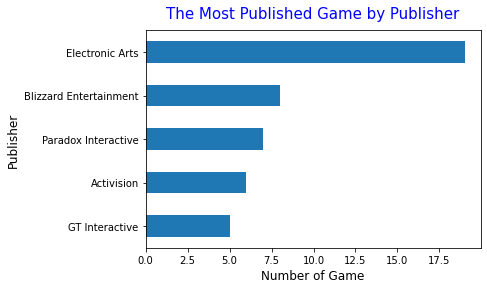

In [68]:
#visualize the most published game by publisher
df_cleaned['Publisher'].value_counts()[:5].sort_values(ascending=True).plot(kind='barh')
plt.title('The Most Published Game by Publisher', fontsize=15, color = 'b', pad =12)
plt.xlabel('Number of Game', fontsize =12)
plt.ylabel('Publisher', fontsize =12)
plt.show()

In [46]:
#which Developer develop most of the games
df_cleaned['Developer'].value_counts()[:1]

Blizzard Entertainment    8
Name: Developer, dtype: int64

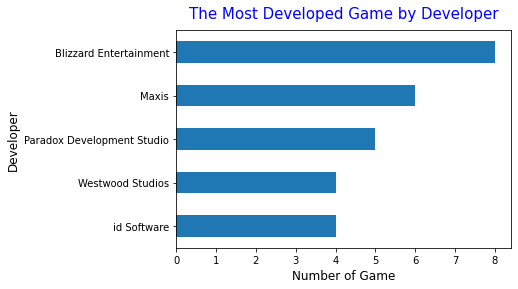

In [65]:
#visualize the most developed game by developer
df_cleaned['Developer'].value_counts()[:5].sort_values(ascending=True).plot(kind='barh')
plt.title('The Most Developed Game by Developer', fontsize=15, color = 'b', pad =12)
plt.xlabel('Number of Game', fontsize =12)
plt.ylabel('Developer', fontsize =12)
plt.show()

In [23]:
#which series is the most sales
series = pd.pivot_table(df_cleaned, index = 'Series', values = 'Sales', aggfunc={'Sales':np.sum}).sort_values('Sales', ascending=False)
series.head()

,Sales
Series,
Unknown,156.1
Minecraft,33.0
Diablo,26.0
The Sims,24.0
Half-Life,21.0


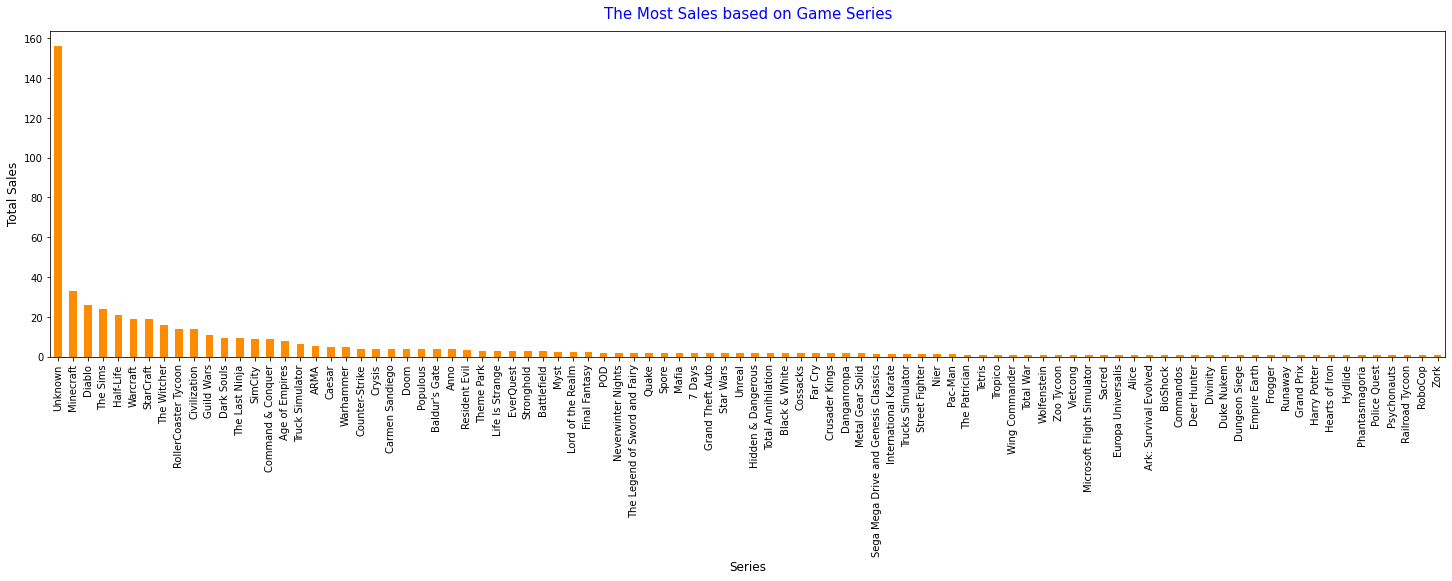

In [58]:
#visualize the most sales by game series
plt.figure(figsize = (25,6))
df_cleaned.groupby('Series')['Sales'].sum().sort_values(ascending=False).plot(kind = 'bar', color = 'darkorange')
plt.title('The Most Sales based on Game Series', fontsize=15, color = 'b', pad =12)
plt.xlabel('Series', fontsize =12)
plt.ylabel('Total Sales', fontsize =12)
plt.show()

In [62]:
#the most games by series
df_cleaned['Series'].value_counts()[:5]

Unknown              36
Command & Conquer     5
StarCraft             4
Age of Empires        4
Civilization          4
Name: Series, dtype: int64

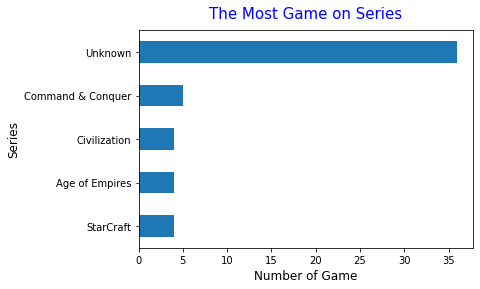

In [64]:
df_cleaned['Series'].value_counts()[:5].sort_values(ascending=True).plot(kind='barh')
plt.title('The Most Game on Series', fontsize=15, color = 'b', pad =12)
plt.xlabel('Number of Game', fontsize =12)
plt.ylabel('Series', fontsize =12)
plt.show()